In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mastercard-stock-data-latest-and-updated/Mastercard_stock_info.csv
/kaggle/input/mastercard-stock-data-latest-and-updated/Mastercard_stock_history.csv


# The Dataset

In [2]:
stocks = pd.read_csv('../input/mastercard-stock-data-latest-and-updated/Mastercard_stock_history.csv')
stocks.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0


In [3]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3872 non-null   object 
 1   Open          3872 non-null   float64
 2   High          3872 non-null   float64
 3   Low           3872 non-null   float64
 4   Close         3872 non-null   float64
 5   Volume        3872 non-null   int64  
 6   Dividends     3872 non-null   float64
 7   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 242.1+ KB


In [4]:
stocks.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


In [5]:
stocks['Dividends'].value_counts()

0.000    3811
0.015      20
0.030       4
0.110       4
0.160       4
0.190       4
0.220       4
0.250       4
0.330       4
0.400       4
0.440       4
0.060       3
0.009       2
Name: Dividends, dtype: int64

In [6]:
stocks['Stock Splits'].value_counts()

0.0     3871
10.0       1
Name: Stock Splits, dtype: int64

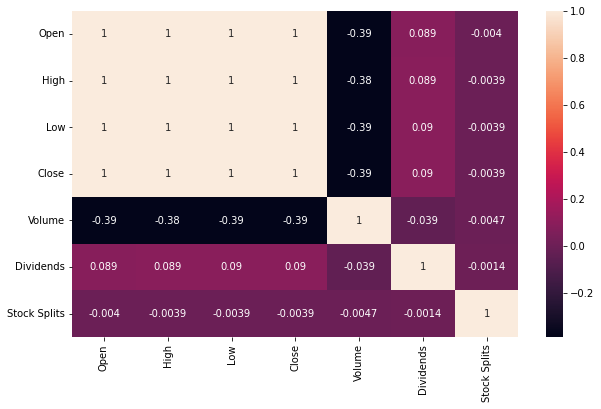

In [7]:
corr = stocks.corr()
sns.heatmap(corr, annot=True).figure.set_size_inches(10, 6)
plt.show()

# Data pre-processing

In [8]:
stocks.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
stocks.head(3)

,Date,Open,High,Low,Close
0,2006-05-25,3.748967,4.283869,3.739664,4.279217
1,2006-05-26,4.307126,4.348058,4.103398,4.179680
2,2006-05-30,4.183400,4.184330,3.986184,4.093164


In [9]:
stocks_to_visualization = stocks
stocks_to_visualization['Date'] = pd.DatetimeIndex(stocks['Date'])
stocks_to_visualization.set_index('Date', drop=True, inplace=True)
stocks_to_visualization.head(3)

,Open,High,Low,Close
Date,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217
2006-05-26,4.307126,4.348058,4.103398,4.179680
2006-05-30,4.183400,4.184330,3.986184,4.093164


In [10]:
stocks_to_visualization.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2006-05-25 to 2021-10-11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3872 non-null   float64
 1   High    3872 non-null   float64
 2   Low     3872 non-null   float64
 3   Close   3872 non-null   float64
dtypes: float64(4)
memory usage: 151.2 KB


# Data Visualization

In [11]:
sns.set_theme(style='darkgrid')

In [12]:
open_column = stocks_to_visualization['Open']
high_column = stocks_to_visualization['High']
low_column = stocks_to_visualization['Low']
close_column = stocks_to_visualization['Close']

## Distribuition

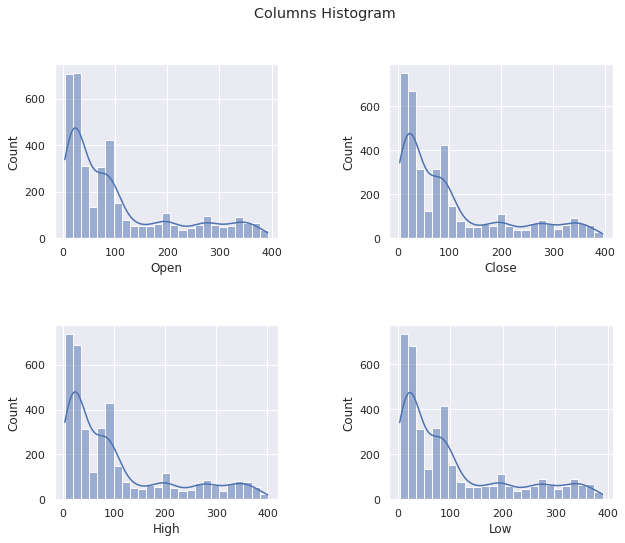

In [13]:
fig, [[ax_open, ax_close], 
      [ax_high, ax_low]] = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.suptitle('Columns Histogram')
sns.histplot(open_column, kde=True, ax=ax_open)
sns.histplot(close_column, kde=True, ax=ax_close)
sns.histplot(high_column, kde=True, ax=ax_high)
sns.histplot(low_column, kde=True, ax=ax_low)
plt.subplots_adjust(wspace=0.5,  
                    hspace=0.5)

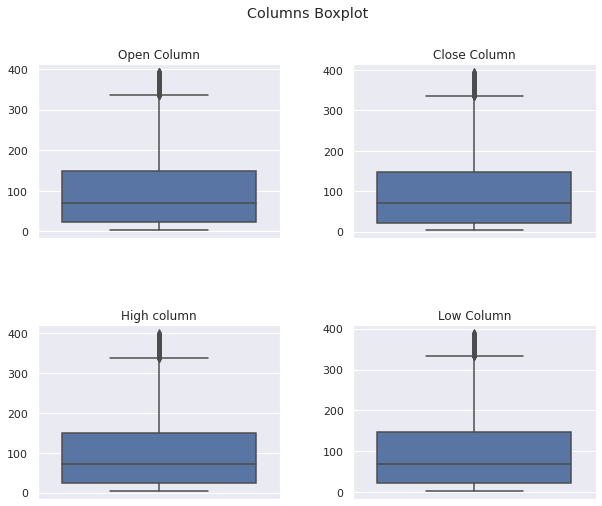

In [14]:
fig, [[ax_open, ax_close], 
      [ax_high, ax_low]] = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.suptitle('Columns Boxplot')
sns.boxplot(data=open_column, ax=ax_open)
ax_open.set_title('Open Column')
sns.boxplot(data=close_column, ax=ax_close)
ax_close.set_title('Close Column')
sns.boxplot(data=high_column, ax=ax_high)
ax_high.set_title('High column')
sns.boxplot(data=low_column, ax=ax_low)
ax_low.set_title('Low Column')
plt.subplots_adjust(wspace=0.3,  
                    hspace=0.5)

for axis in ax_open, ax_close, ax_high, ax_low:
    axis.get_xaxis().set_visible(b=False)

# Linear Regression

In [15]:
scaler = MinMaxScaler()
stocks_columns = stocks.columns
stocks = scaler.fit_transform(stocks)
stocks = pd.DataFrame(data=stocks, columns=stocks_columns)
X = stocks.drop('Close', axis='columns')
y = stocks['Close']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3097, 3), (775, 3), (3097,), (775,))

### Model

In [17]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### Predict

In [18]:
predict = lm.predict(X_test)

### Individual Results

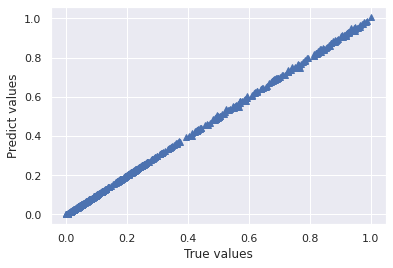

In [19]:
plt.plot(y_test, predict, '^')
plt.xlabel('True values')
plt.ylabel('Predict values')
plt.show()

In [20]:
r2 = r2_score(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predict)
mape = mean_absolute_percentage_error(y_test, predict)
print(f'R²: {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

R²: 0.9999124488906175
Mean Squared Error (MSE): 6.638470455126818e-06
Root Mean Squared Error (RMSE): 0.0025765229389871185
Mean Absolute Error (MAE): 0.0013204480521620229
Mean Absolute Percentage Error (MAPE): 0.011564057655855563


## XGBoost

### GridSearch

In [21]:
clf_xgb = xgb.XGBRegressor()

In [22]:
xgb_params = {
    'n_estimators': np.arange(1, 20),
    'objective': ['reg:squarederror', 'reg:squaredlogerror'],
    'booster': ['gblinear']
}
grid_search_xgb = GridSearchCV(estimator=clf_xgb, param_grid=xgb_params, return_train_score=True)
grid_search_xgb.fit(X_train, y_train)
best_params_xgb = grid_search_xgb.best_params_
best_params_xgb

{'booster': 'gblinear', 'n_estimators': 19, 'objective': 'reg:squaredlogerror'}

### Model

In [23]:
clf_xgb = xgb.XGBRegressor(booster=best_params_xgb['booster'],
                       n_estimators=best_params_xgb['n_estimators'],
                       objective=best_params_xgb['objective'])
clf_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=19, n_jobs=0,
             num_parallel_tree=None, objective='reg:squaredlogerror',
             predictor=None, random_state=0, reg_alpha=0, ...)

### Predict

In [24]:
y_predict_xgb = clf_xgb.predict(X_test)

### Individual Results

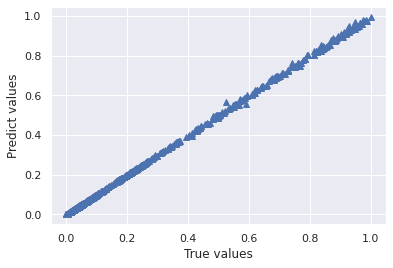

In [25]:
plt.plot(y_test, y_predict_xgb, '^')
plt.xlabel('True values')
plt.ylabel('Predict values')
plt.show()

In [26]:
xgb_r2 = r2_score(y_test, y_predict_xgb)
xgb_mse = mean_squared_error(y_test, y_predict_xgb)
xgb_rmse = np.sqrt(mse)
xgb_mae = mean_absolute_error(y_test, y_predict_xgb)
xgb_mape = mean_absolute_percentage_error(y_test, y_predict_xgb)
print(f'R²: {xgb_r2}')
print(f'Mean Squared Error (MSE): {xgb_mse}')
print(f'Root Mean Squared Error (RMSE): {xgb_rmse}')
print(f'Mean Absolute Error (MAE): {xgb_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {xgb_mape}')

R²: 0.999779380776842
Mean Squared Error (MSE): 1.672821972328564e-05
Root Mean Squared Error (RMSE): 0.0025765229389871185
Mean Absolute Error (MAE): 0.002026749003589334
Mean Absolute Percentage Error (MAPE): 0.0344747724416904


## Linear Regression vs XGBoost Regressor

In [27]:
data_dict = {
    'R² - LR': r2,
    'R² - XGBoost': xgb_r2,
    'Mean Squared Error (MSE) - LR': mse,
    'Mean Squared Error (MSE) - XGBoost': xgb_mse,
    'Root Mean Squared Error (RMSE) - LR': rmse,
    'Root Mean Squared Error (RMSE) - XGBoost': xgb_rmse,
    'Mean Absolute Error (MAE) - LR': mae,
    'Mean Absolute Error (MAE) - XGBoost': xgb_mae,
    'Mean Absolute Percentage Error (MAPE) - LR': mape,
    'Mean Absolute Percentage Error (MAPE) - XGBoost': xgb_mape
}
data_columns = list(data_dict.keys())

In [28]:
pd.DataFrame(data=data_dict, columns=data_columns, index=range(1, 11))

,R² - LR,R² - XGBoost,Mean Squared Error (MSE) - LR,Mean Squared Error (MSE) - XGBoost,Root Mean Squared Error (RMSE) - LR,Root Mean Squared Error (RMSE) - XGBoost,Mean Absolute Error (MAE) - LR,Mean Absolute Error (MAE) - XGBoost,Mean Absolute Percentage Error (MAPE) - LR,Mean Absolute Percentage Error (MAPE) - XGBoost
1,0.999912,0.999779,0.000007,0.000017,0.002577,0.002577,0.00132,0.002027,0.011564,0.034475
2,0.999912,0.999779,0.000007,0.000017,0.002577,0.002577,0.00132,0.002027,0.011564,0.034475
3,0.999912,0.999779,0.000007,0.000017,0.002577,0.002577,0.00132,0.002027,0.011564,0.034475
4,0.999912,0.999779,0.000007,0.000017,0.002577,0.002577,0.00132,0.002027,0.011564,0.034475
5,0.999912,0.999779,0.000007,0.000017,0.002577,0.002577,0.00132,0.002027,0.011564,0.034475
6,0.999912,0.999779,0.000007,0.000017,0.002577,0.002577,0.00132,0.002027,0.011564,0.034475
7,0.999912,0.999779,0.000007,0.000017,0.002577,0.002577,0.00132,0.002027,0.011564,0.034475
8,0.999912,0.999779,0.000007,0.000017,0.002577,0.002577,0.00132,0.002027,0.011564,0.034475
9,0.999912,0.999779,0.000007,0.000017,0.002577,0.002577,0.00132,0.002027,0.011564,0.034475
10,0.999912,0.999779,0.000007,0.000017,0.002577,0.002577,0.00132,0.002027,0.011564,0.034475


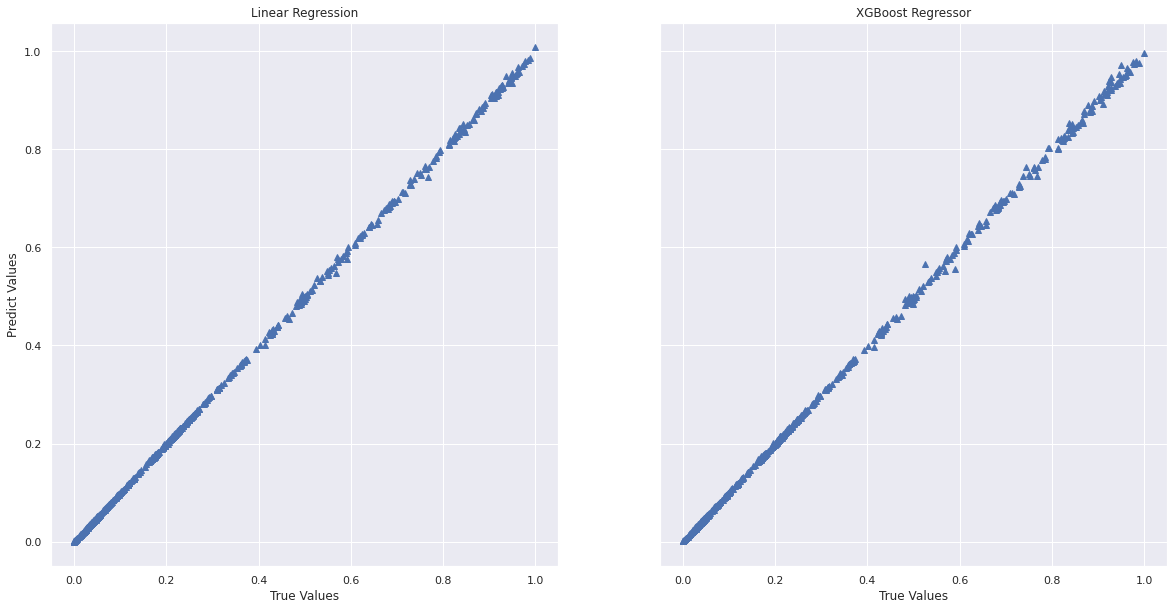

In [29]:
figure, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 10), sharey=True, sharex =True)
ax1.plot(y_test, predict, '^')
ax1.set_xlabel('True Values')
ax1.set_ylabel('Predict Values')
ax1.set_title('Linear Regression')
ax2.plot(y_test, y_predict_xgb, '^')
ax2.set_xlabel('True Values')
ax2.set_title('XGBoost Regressor')
plt.show()

In [30]:
import pickle

# Pickle the Linear Regression model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lm, file)